### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Import Data

In [3]:
df = pd.read_csv("C:\\Data Science\\Project\\test.csv")
print(df)

             id  MonsoonIntensity  TopographyDrainage  RiverManagement  \
0       1117957                 4                   6                3   
1       1117958                 4                   4                2   
2       1117959                 1                   3                6   
3       1117960                 2                   4                4   
4       1117961                 6                   3                2   
...         ...               ...                 ...              ...   
745300  1863257                 5                   4                8   
745301  1863258                 4                   4                2   
745302  1863259                 5                   7                9   
745303  1863260                 4                   7                6   
745304  1863261                 4                   2                5   

        Deforestation  Urbanization  ClimateChange  DamsQuality  Siltation  \
0                   5            

### Basic informations

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745305 entries, 0 to 745304
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   id                               745305 non-null  int64
 1   MonsoonIntensity                 745305 non-null  int64
 2   TopographyDrainage               745305 non-null  int64
 3   RiverManagement                  745305 non-null  int64
 4   Deforestation                    745305 non-null  int64
 5   Urbanization                     745305 non-null  int64
 6   ClimateChange                    745305 non-null  int64
 7   DamsQuality                      745305 non-null  int64
 8   Siltation                        745305 non-null  int64
 9   AgriculturalPractices            745305 non-null  int64
 10  Encroachments                    745305 non-null  int64
 11  IneffectiveDisasterPreparedness  745305 non-null  int64
 12  DrainageSystems               

### Data Cleaning

### Check duplicates

In [5]:
print(df.duplicated())

0         False
1         False
2         False
3         False
4         False
          ...  
745300    False
745301    False
745302    False
745303    False
745304    False
Length: 745305, dtype: bool


### Box plot

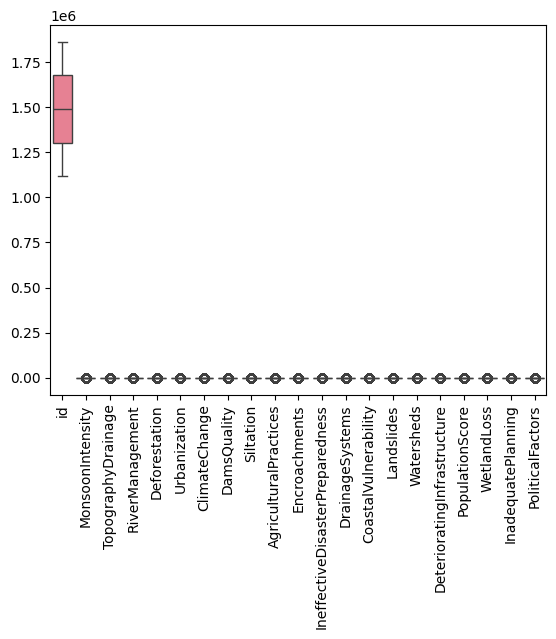

In [6]:
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

## Encoding Categorial Data

In [7]:
categ_col = df.select_dtypes(include=['object']).columns

# Initialize encoders
label_encoder = LabelEncoder()

# Encode each categorical column using Label Encoding for simplicity
encoded_data = df.copy()
for i in categ_col:
    encoded_data[i] = label_encoder.fit_transform(df[i])

# Display the first 5 rows of the encoded dataset
print(encoded_data)

             id  MonsoonIntensity  TopographyDrainage  RiverManagement  \
0       1117957                 4                   6                3   
1       1117958                 4                   4                2   
2       1117959                 1                   3                6   
3       1117960                 2                   4                4   
4       1117961                 6                   3                2   
...         ...               ...                 ...              ...   
745300  1863257                 5                   4                8   
745301  1863258                 4                   4                2   
745302  1863259                 5                   7                9   
745303  1863260                 4                   7                6   
745304  1863261                 4                   2                5   

        Deforestation  Urbanization  ClimateChange  DamsQuality  Siltation  \
0                   5            

## Extract Dependent and Independent Variables

In [8]:
X = encoded_data.iloc[:,0:9]   #Independent variable
y = encoded_data['id']     #dependent variable

## Statistical Analysis
### (Correlation,Describe) 

In [9]:
print(df.describe())

                 id  MonsoonIntensity  TopographyDrainage  RiverManagement  \
count  7.453050e+05     745305.000000       745305.000000    745305.000000   
mean   1.490609e+06          4.915610            4.930288         4.960027   
std    2.151512e+05          2.056295            2.094117         2.071722   
min    1.117957e+06          0.000000            0.000000         0.000000   
25%    1.304283e+06          3.000000            3.000000         4.000000   
50%    1.490609e+06          5.000000            5.000000         5.000000   
75%    1.676935e+06          6.000000            6.000000         6.000000   
max    1.863261e+06         16.000000           17.000000        16.000000   

       Deforestation   Urbanization  ClimateChange    DamsQuality  \
count  745305.000000  745305.000000  745305.000000  745305.000000   
mean        4.946084       4.938424       4.933524       4.958468   
std         2.052602       2.081816       2.059243       2.089312   
min         0.000000 

                                       id  MonsoonIntensity  \
id                               1.000000         -0.000186   
MonsoonIntensity                -0.000186          1.000000   
TopographyDrainage              -0.000883         -0.008956   
RiverManagement                 -0.000005         -0.007600   
Deforestation                   -0.001055         -0.007738   
Urbanization                     0.002439         -0.007608   
ClimateChange                    0.001370         -0.004739   
DamsQuality                     -0.000524         -0.009604   
Siltation                       -0.001144         -0.006605   
AgriculturalPractices           -0.000130         -0.010084   
Encroachments                    0.001353         -0.008617   
IneffectiveDisasterPreparedness  0.000987         -0.009894   
DrainageSystems                  0.000945         -0.006958   
CoastalVulnerability             0.000399         -0.010685   
Landslides                      -0.000992         -0.00

<Axes: >

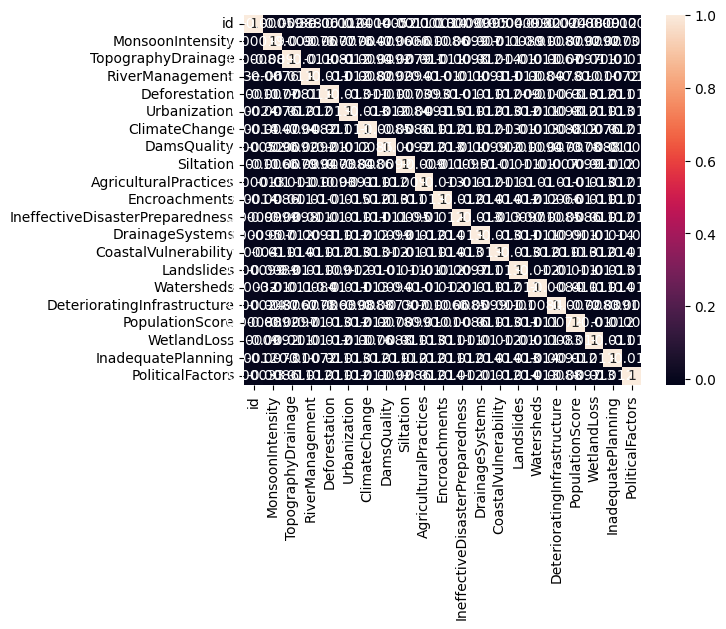

In [10]:
corre = df.corr(numeric_only=True)
print(corre)
sns.heatmap(corre,annot=True)

## Split Train and Test Data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Build Model

In [12]:
model = LinearRegression()
model.fit(X_train,y_train)

#pedicition the test set result
y_pred = model.predict(X_test)
data = pd.DataFrame({'Actual': y_test, 'predicted' : y_pred})
print(data)

         Actual  predicted
194521  1312478  1312478.0
436270  1554227  1554227.0
404038  1521995  1521995.0
432465  1550422  1550422.0
283183  1401140  1401140.0
...         ...        ...
694608  1812565  1812565.0
617884  1735841  1735841.0
301718  1419675  1419675.0
486066  1604023  1604023.0
708763  1826720  1826720.0

[149061 rows x 2 columns]


In [13]:
score = r2_score(y_test,y_pred)
print("r2 score is ",score*100,"%")

r2 score is  100.0 %
